<a href="https://colab.research.google.com/github/VUT-BA-3-2-Project-2025/Team-force/blob/Usher-Branch/Teamforce_one_on_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All imports here

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

Reading our dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/VUT-BA-3-2-Project-2025/Team-force/main/logistics_dataset.csv")
df.head()

,item_id,category,stock_level,reorder_point,reorder_frequency_days,lead_time_days,daily_demand,demand_std_dev,item_popularity_score,storage_location_id,...,unit_price,holding_cost_per_unit_day,stockout_count_last_month,order_fulfillment_rate,total_orders_last_month,turnover_ratio,layout_efficiency_score,last_restock_date,forecasted_demand_next_7d,KPI_score
0,ITM10000,Pharma,283,21,4,4,49.85,1.56,0.43,L82,...,117.80,1.14,0,0.80,700,3.33,0.33,2024-02-17,184.37,0.556
1,ITM10001,Automotive,301,52,9,6,23.34,2.55,0.69,L15,...,178.80,1.09,3,0.79,736,10.36,0.98,2024-10-01,221.94,0.723
2,ITM10002,Groceries,132,60,11,8,37.69,3.15,0.62,L4,...,54.05,0.95,7,0.75,814,14.32,0.87,2024-04-07,53.85,0.680
3,ITM10003,Automotive,346,46,13,5,33.69,2.79,0.21,L95,...,31.10,1.90,0,0.96,994,2.08,0.29,2024-01-27,92.04,0.488
4,ITM10004,Automotive,49,55,4,6,49.58,5.23,0.31,L36,...,104.97,0.63,5,0.83,299,5.65,0.96,2024-05-17,194.58,0.670


EDA - analyzing data

In [3]:
df.describe()

,stock_level,reorder_point,reorder_frequency_days,lead_time_days,daily_demand,demand_std_dev,item_popularity_score,picking_time_seconds,handling_cost_per_unit,unit_price,holding_cost_per_unit_day,stockout_count_last_month,order_fulfillment_rate,total_orders_last_month,turnover_ratio,layout_efficiency_score,forecasted_demand_next_7d,KPI_score
count,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000
mean,263.491573,54.759363,8.507803,5.578340,25.435868,5.260078,0.542325,95.606429,2.777116,105.887575,1.045993,4.602372,0.849738,521.714732,8.123677,0.600581,154.286245,0.601737
std,138.568360,26.053354,3.473229,2.292486,14.038861,2.725639,0.259200,49.218084,1.305213,54.428161,0.550480,2.883708,0.086703,276.768531,4.069191,0.230511,82.945255,0.108286
min,20.000000,10.000000,3.000000,2.000000,1.010000,0.500000,0.100000,10.000000,0.500000,10.220000,0.100000,0.000000,0.700000,50.000000,1.000000,0.200000,10.090000,0.259000
25%,144.000000,32.000000,5.000000,4.000000,13.535000,2.917500,0.310000,53.000000,1.660000,59.760000,0.580000,2.000000,0.780000,283.000000,4.590000,0.400000,83.190000,0.527000
50%,264.000000,55.000000,9.000000,6.000000,25.405000,5.235000,0.540000,96.000000,2.810000,106.005000,1.050000,5.000000,0.850000,513.500000,8.150000,0.600000,152.870000,0.601000
75%,386.000000,78.000000,12.000000,8.000000,37.412500,7.542500,0.760000,138.000000,3.910000,152.410000,1.522500,7.000000,0.920000,764.250000,11.692500,0.800000,225.440000,0.677250
max,499.000000,99.000000,14.000000,9.000000,49.980000,10.000000,1.000000,179.000000,5.000000,200.000000,2.000000,9.000000,1.000000,999.000000,15.000000,1.000000,299.940000,0.936000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_id                    3204 non-null   object 
 1   category                   3204 non-null   object 
 2   stock_level                3204 non-null   int64  
 3   reorder_point              3204 non-null   int64  
 4   reorder_frequency_days     3204 non-null   int64  
 5   lead_time_days             3204 non-null   int64  
 6   daily_demand               3204 non-null   float64
 7   demand_std_dev             3204 non-null   float64
 8   item_popularity_score      3204 non-null   float64
 9   storage_location_id        3204 non-null   object 
 10  zone                       3204 non-null   object 
 11  picking_time_seconds       3204 non-null   int64  
 12  handling_cost_per_unit     3204 non-null   float64
 13  unit_price                 3204 non-null   float

Data Cleaning

In [5]:
# Convert date column from object to datetime type
df['last_restock_date'] = pd.to_datetime(df['last_restock_date'])

In [7]:
#just a safe check, count missing numeric values in each field
missing_numeric_count = df.select_dtypes(include=['float64', 'int64']).isna().sum()
print(missing_numeric_count)

#swwet, no missing values in numeric data

stock_level                  0
reorder_point                0
reorder_frequency_days       0
lead_time_days               0
daily_demand                 0
demand_std_dev               0
item_popularity_score        0
picking_time_seconds         0
handling_cost_per_unit       0
unit_price                   0
holding_cost_per_unit_day    0
stockout_count_last_month    0
order_fulfillment_rate       0
total_orders_last_month      0
turnover_ratio               0
layout_efficiency_score      0
forecasted_demand_next_7d    0
KPI_score                    0
days_since_restock           0
week_of_year                 0
dtype: int64


In [25]:
# Feature Engineering
df['days_since_restock'] = (datetime.now() - df['last_restock_date']).dt.days
df['month'] = df['last_restock_date'].dt.month
df['week_of_year'] = df['last_restock_date'].dt.isocalendar().week.astype(int)

In [8]:
#count missing object (string) fileds
missing_object_count = df.select_dtypes(include=['object']).isna().sum()
print(missing_object_count)

#confirmed, no missing data in any column

item_id                0
category               0
storage_location_id    0
zone                   0
dtype: int64


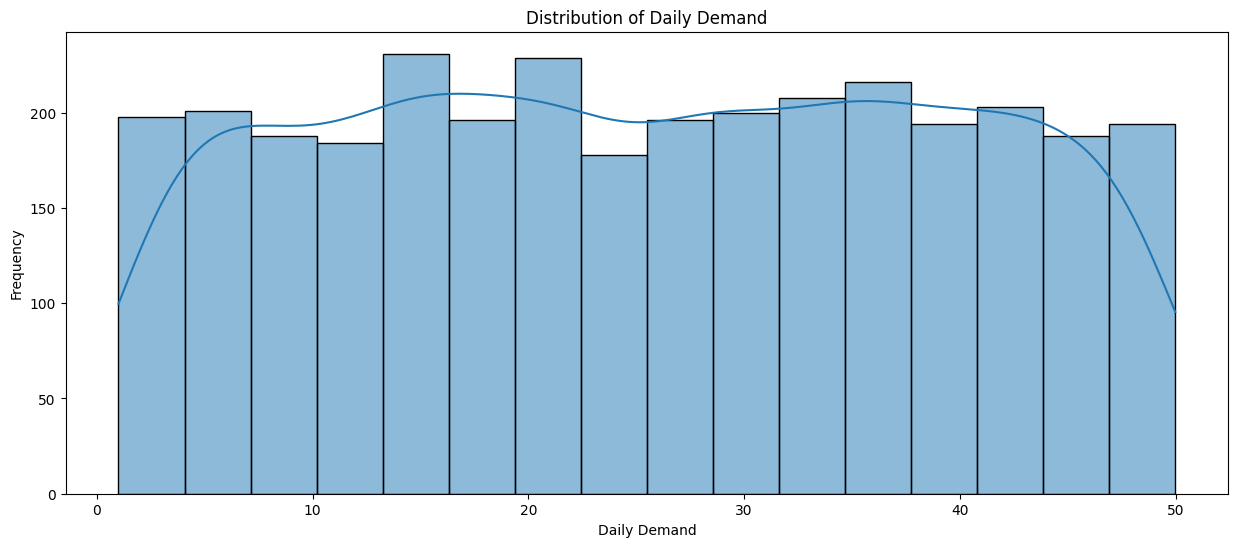

In [21]:
plt.figure(figsize=(15, 6))
sns.histplot(df['daily_demand'], kde=True)
plt.title('Distribution of Daily Demand')
plt.xlabel('Daily Demand')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Distribution of Stock Level')

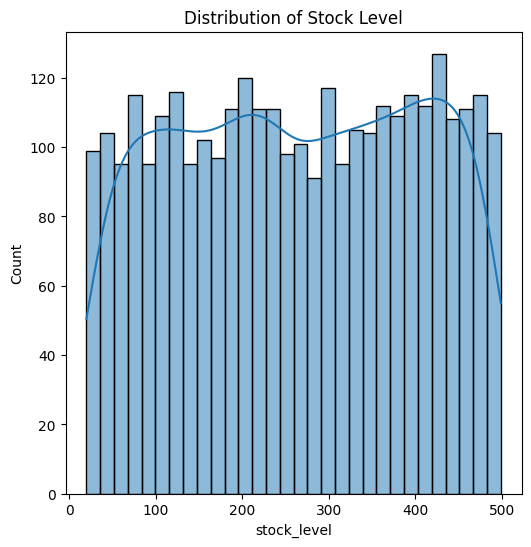

In [24]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 2)
sns.histplot(df['stock_level'], kde=True, bins=30)
plt.title('Distribution of Stock Level')

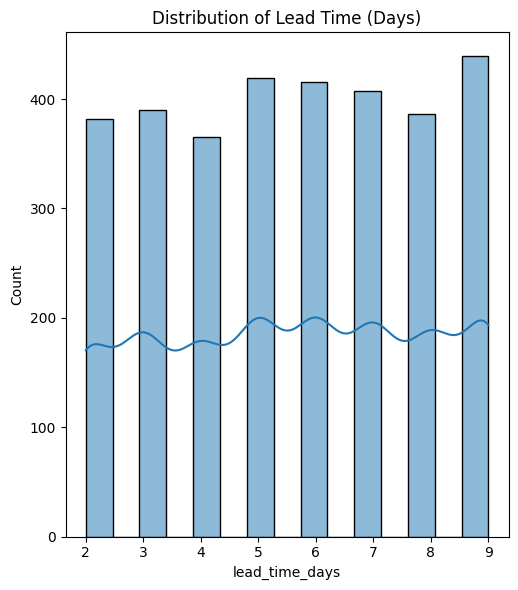

In [23]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 3)
sns.histplot(df['lead_time_days'], kde=True, bins=15)
plt.title('Distribution of Lead Time (Days)')
plt.tight_layout()
plt.show()

Train our model to predict future demands.

In [51]:
features = ['stock_level', 'reorder_point', 'lead_time_days', 'daily_demand',
        'demand_std_dev', 'item_popularity_score', 'total_orders_last_month',
        'turnover_ratio', 'days_since_restock',
        'month', 'day_of_year', 'week_of_year']
target = 'forecasted_demand_next_7d'

In [52]:
X = df[features]
y = df[target]

In [53]:
#splilt data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
#train it
model = RandomForestRegressor(n_estimators=150, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=150, random_state=42)

In [55]:
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Demand Forecasting Model (Gradient Boosting Regressor) RMSE: {rmse:.2f}")

Demand Forecasting Model (Gradient Boosting Regressor) RMSE: 85.63


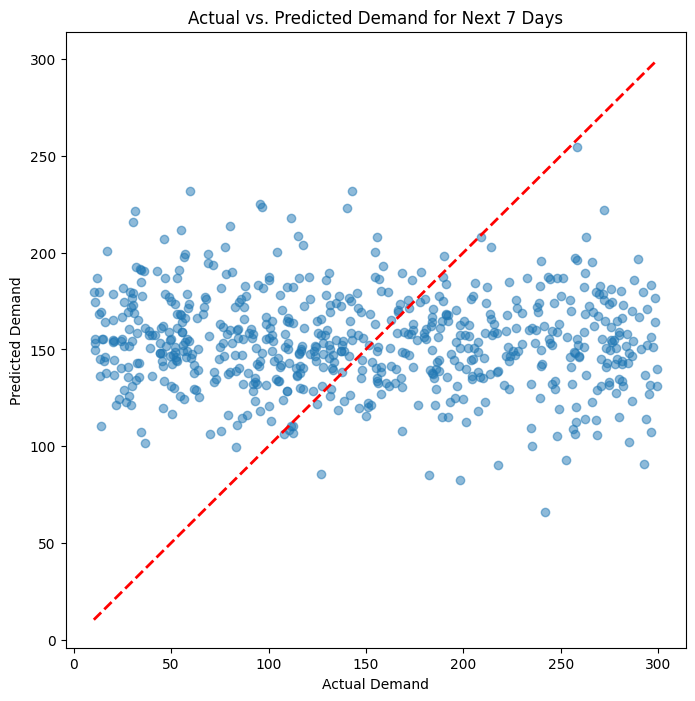

In [31]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.title("Actual vs. Predicted Demand for Next 7 Days")
plt.show()

In [32]:
model = RandomForestRegressor(
    n_estimators=150,
    max_depth=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

In [33]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=5, n_estimators=150,
                      n_jobs=-1, random_state=42)

In [34]:
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
target_std_dev = y_test.std()

In [35]:
print(f"\n--- Model Performance Evaluation ---")
print(f"Standard Deviation of Target: {target_std_dev:.2f}")
print(f"IMPROVED Model RMSE: {rmse:.2f}")


--- Model Performance Evaluation ---
Standard Deviation of Target: 84.13
IMPROVED Model RMSE: 85.31


Calculate the most efficient pick-paths for employees.

In [37]:
def calculate_efficient_pick_path(item_ids_to_pick, df):
    """
    Calculates the most efficient path to pick a list of items using a
    real-world algorithm to solve the Traveling Salesperson Problem (TSP).
    """
    print("\n--- Calculating Efficient Pick-Path ---")
    if not item_ids_to_pick:
        print("No items provided for picking.")
        return []

    # 1. Get the locations (zone, storage_id) for the items we need to pick
    item_locations = df[df['item_id'].isin(item_ids_to_pick)]
    if item_locations.empty:
        print("Warning: Could not find any of the specified items.")
        return []

    # 2. Simulate real-world (x, y) coordinates for each item
    # This turns "Zone A, Location L54" into a point on a map.
    coordinates = {}
    for _, item in item_locations.iterrows():
        zone_offset = (ord(item['zone']) - ord('A')) * 100
        loc_id_val = int(item['storage_location_id'].replace('L', ''))
        x = zone_offset + (loc_id_val % 10) * 10
        y = (loc_id_val // 10) * 10
        coordinates[item['item_id']] = (x, y)

    # 3. Use the "Nearest Neighbor" algorithm to find a near-optimal route
    locations = {'DEPOT': (0, 0), **coordinates}
    unvisited_items = list(coordinates.keys())
    current_location = 'DEPOT'
    route = [current_location]

    while unvisited_items:
        # Find the closest unvisited item to our current location
        nearest_item = min(unvisited_items, key=lambda item: distance.euclidean(locations[current_location], locations[item]))
        current_location = nearest_item
        route.append(current_location)
        unvisited_items.remove(current_location)

    route.append('DEPOT') # Add the return trip to the depot

    # 4. Format the route into clear, step-by-step instructions for an employee
    item_info = df.set_index('item_id')
    route_instructions = []
    for step, item_id in enumerate(route):
        if item_id == 'DEPOT':
            if step == 0:
                route_instructions.append(f"{step+1}. Start at the Depot.")
            else:
                route_instructions.append(f"{step+1}. Return to the Depot.")
        else:
            info = item_info.loc[item_id]
            route_instructions.append(f"{step+1}. Go to Zone {info['zone']}, Location {info['storage_location_id']} and pick Item {item_id}.")

    return route_instructions

In [40]:
# --- Run Core Objective 2 ---
# Create a sample order for an employee to pick
sample_order = ['ITM10002', 'ITM10158', 'ITM10034', 'ITM10210']

# Calculate the most efficient route for this order
efficient_route = calculate_efficient_pick_path(sample_order, df)

# Display the results
print("\n--- Generated Picking Route for Employee ---")
if efficient_route:
  for instruction in efficient_route:
    print(instruction)

NameError: name 'main_df' is not defined